# S & P 500 Stocks

- **S&P 500 stocks:** Use the [S&P 500 stock data](https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks/versions/950?select=sp500_stocks.csv) to address the following questions:
  - What is the inter-relationship between
    1. Stocks within the same industry (e.g. the relationship in price changes between all tech stocks)
    2. Stocks across different industries (e.g. do tech stocks seem to move in a similar fashion to stock in another industry?)
  - What leading indicators seem to predict movements in stocks?

## Loading the Data

In [ ]:
import pandas as pd

In [ ]:
companies_df = pd.read_csv('/content/drive/MyDrive/Project 2 Group 3/sp500_companies.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
companies_df.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,229.04,3482347110400,1.317810e+11,0.049,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.064706
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.81,3306889150464,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.061446
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,415.84,3090955370496,1.294330e+11,0.152,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.057433
3,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,162.08,2001979834368,1.154780e+11,0.136,Mountain View,CA,United States,179582.0,Alphabet Inc. offers various products and plat...,0.037199
4,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,163.18,2000603054080,1.154780e+11,0.136,Mountain View,CA,United States,179582.0,Alphabet Inc. offers various products and plat...,0.037173


In [ ]:
# Check similarity of Shortname and Longname columns
companies_df['Shortname'] == companies_df['Longname']

# Shortname seems to be the column to remove in the data set, it is very similar to long name

,0
0,True
1,True
2,True
3,True
4,True
...,...
498,True
499,True
500,True
501,True


In [ ]:
# show shortname and logname columns
companies_df[['Shortname', 'Longname']]

,Shortname,Longname
0,Apple Inc.,Apple Inc.
1,NVIDIA Corporation,NVIDIA Corporation
2,Microsoft Corporation,Microsoft Corporation
3,Alphabet Inc.,Alphabet Inc.
4,Alphabet Inc.,Alphabet Inc.
...,...,...
498,BorgWarner Inc.,BorgWarner Inc.
499,"Walgreens Boots Alliance, Inc.","Walgreens Boots Alliance, Inc."
500,FMC Corporation,FMC Corporation
501,Paramount Global,Paramount Global


In [ ]:
index_df = pd.read_csv('/content/drive/MyDrive/Project 2 Group 3/sp500_index.csv')

In [ ]:
index_df.head()

,Date,S&P500
0,2014-10-09,1928.21
1,2014-10-10,1906.13
2,2014-10-13,1874.74
3,2014-10-14,1877.70
4,2014-10-15,1862.49


In [ ]:
stocks_df = pd.read_csv('/content/drive/MyDrive/Project 2 Group 3/sp500_stocks.csv')

In [ ]:
stocks_df.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,44.016735,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,43.741009,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,44.361355,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,44.393166,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,44.705990,70.501671,70.501671,69.648827,69.974915,4073337.0


## Cleaning the Data

In [ ]:
# Count percentage of NA values
companies_df.isna().sum() / len(companies_df)

,0
Exchange,0.000000
Symbol,0.000000
Shortname,0.000000
Longname,0.000000
Sector,0.001988
Industry,0.001988
Currentprice,0.001988
Marketcap,0.000000
Ebitda,0.059642
Revenuegrowth,0.005964


In [ ]:
# Clear NAs from all 3 dfs
companies_df.dropna(inplace=True)
index_df.dropna(inplace=True)
stocks_df.dropna(inplace=True)

In [ ]:
# Merge datasets
merged_stocksdf = pd.merge(stocks_df, companies_df, on="Symbol")
sp_df = pd.merge(merged_stocksdf, index_df, on="Date")

In [ ]:
sp_df.columns

Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Exchange', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight',
       'S&P500'],
      dtype='object')

In [ ]:
sp_df.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight,S&P500
0,2014-10-09,MMM,82.746513,115.919731,118.311035,115.660538,118.018394,4506528.0,NYQ,3M Company,...,73316786176,7.350000e+09,-0.004,Saint Paul,MN,United States,85000.0,3M Company provides diversified technology ser...,0.001362,1928.21
1,2014-10-10,MMM,79.875694,111.897995,116.722404,111.889633,116.496658,8810334.0,NYQ,3M Company,...,73316786176,7.350000e+09,-0.004,Saint Paul,MN,United States,85000.0,3M Company provides diversified technology ser...,0.001362,1906.13
2,2014-10-13,MMM,79.320625,111.120399,113.168900,109.540131,112.257523,5481746.0,NYQ,3M Company,...,73316786176,7.350000e+09,-0.004,Saint Paul,MN,United States,85000.0,3M Company provides diversified technology ser...,0.001362,1874.74
3,2014-10-14,MMM,80.084595,112.190636,113.662209,111.379601,111.747490,4358583.0,NYQ,3M Company,...,73316786176,7.350000e+09,-0.004,Saint Paul,MN,United States,85000.0,3M Company provides diversified technology ser...,0.001362,1877.70
4,2014-10-15,MMM,80.108467,112.224083,112.575249,109.197327,110.836121,5734461.0,NYQ,3M Company,...,73316786176,7.350000e+09,-0.004,Saint Paul,MN,United States,85000.0,3M Company provides diversified technology ser...,0.001362,1862.49


In [ ]:
# Download merged dataset
sp_df.to_csv('sp_df.csv', index=False)

## Research Questions

### How strongly correlated are the price changes of stocks within the same industry?

#### Is there a significant relationship in price changes within industries, and are some industries more tightly correlated than others (e.g., tech stocks vs. utilities)?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate daily percentage changes (returns)
sp_df['Daily_Return'] = sp_df.groupby('Symbol')['Close'].pct_change()

# Filter tech sector stocks
tech_stocks = sp_df[sp_df['Sector'] == 'Technology']

# Pivot table to organize returns by symbol and date
returns_pivot = tech_stocks.pivot_table(values='Daily_Return', index='Date', columns='Symbol')

# Compute pairwise correlation between tech stock returns
tech_corr = returns_pivot.corr()

- AMAT and LRCX: A correlation of 0.896 means these two stocks have a very strong positive correlation—when one stock’s price changes, the other is likely to follow in the same direction.

- CDNS and SNPS: A correlation of 0.852 indicates a strong positive relationship.

- KLAC and LRCX: A correlation of 0.848 suggests another strong positive correlation, meaning their price changes are highly related.

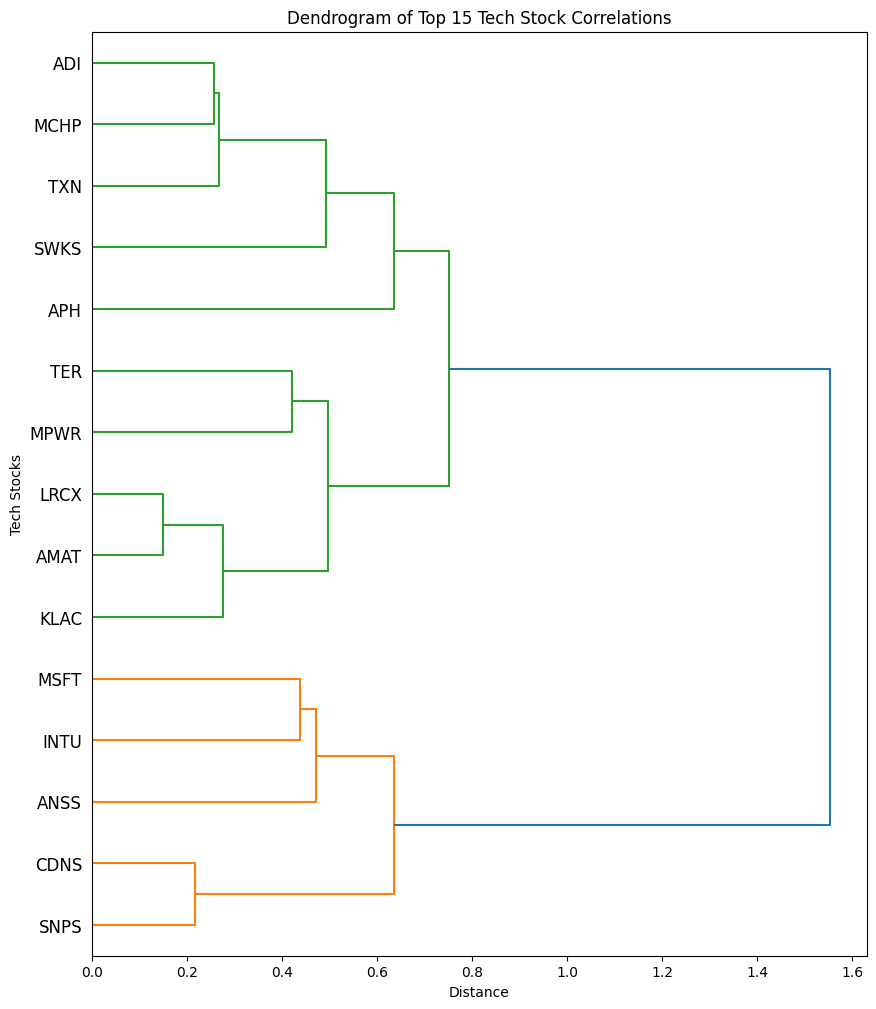

In [ ]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Select the top N sectors based on the highest average correlation
top_n = 15  # Change this to 10 if needed

# Compute average correlation for each stock
avg_correlation = tech_corr.mean().sort_values(ascending=False)

# Select the top N stocks
top_symbols = avg_correlation.head(top_n).index

# Filter the correlation matrix
filtered_corr = tech_corr.loc[top_symbols, top_symbols]

# Perform hierarchical clustering on the filtered matrix
linkage_matrix = linkage(filtered_corr, method='ward')

# Plot the dendrogram horizontally
plt.figure(figsize=(10, 12), facecolor='none')
dendrogram(linkage_matrix, labels=filtered_corr.columns, leaf_rotation=0, orientation='right')

ax = plt.gca()  # Get current axes
ax.set_facecolor('none')

plt.title(f"Dendrogram of Top {top_n} Tech Stock Correlations")
plt.xlabel("Distance")
plt.ylabel("Tech Stocks")
plt.show()


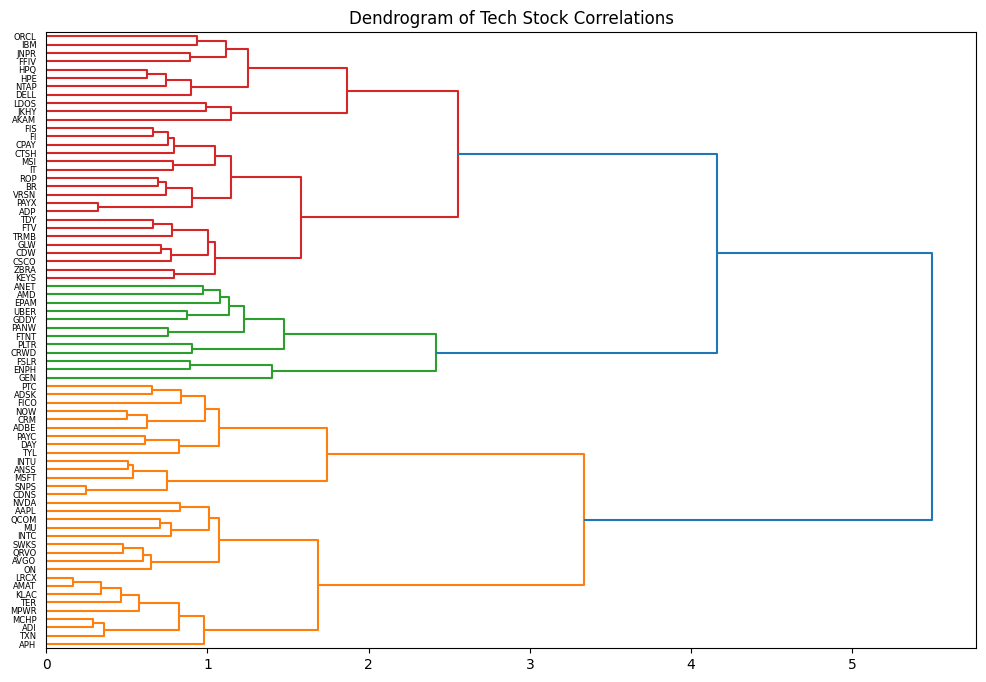

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Perform hierarchical clustering on the correlation matrix
linkage_matrix = linkage(tech_corr, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8), facecolor = 'none')
dendrogram(linkage_matrix, labels=tech_corr.columns, leaf_rotation=0, orientation='right')
ax = plt.gca()  # Get current axes
ax.set_facecolor('none')
plt.title("Dendrogram of Tech Stock Correlations")
plt.show()

- As you move upward, similar stocks are progressively merged into larger clusters.

- The height of the branches (the y-axis) indicates how dissimilar the stocks or clusters are. The shorter the branch, the more similar the stocks are.

- The orange, green, and red clusters could correspond to different tech subsectors like semiconductors, software, or IT services.

- For example, stocks within the same cluster (same color) are more likely to respond to common market factors. Stocks in different clusters (different colors) are less dependent on each other, offering possible diversification benefits.

In [ ]:
# show different industries
sp_df['Sector'].unique()

# show biggest sectors
sp_df['Sector'].value_counts()

# Technology, Industrials, Healthcare

,count
Sector,
Technology,180190
Industrials,154917
Healthcare,150428
Consumer Cyclical,126813
Consumer Defensive,90262
Financial Services,82877
Real Estate,76632
Utilities,75828
Energy,55374


In [ ]:
import pandas as pd

# Assuming sp_df is your DataFrame containing stock data with columns 'Symbol', 'Sector', 'Close', and 'Date'

# Calculate daily returns
sp_df['Daily_Return'] = sp_df.groupby('Symbol')['Close'].pct_change()

# Filter for desired sectors
filtered_sectors = sp_df[sp_df['Sector'].isin(['Healthcare', 'Technology', 'Industrials'])]

# Create pivot table
returns_pivot = filtered_sectors.pivot_table(values='Daily_Return', index='Date', columns='Symbol')

# Calculate correlation matrix
sector_corr = returns_pivot.corr()

# Calculate average correlation
healthcare_corr = sector_corr.loc[filtered_sectors['Symbol'][filtered_sectors['Sector'] == 'Healthcare'].unique(),
                                 filtered_sectors['Symbol'][filtered_sectors['Sector'] != 'Healthcare'].unique()]

tech_corr = sector_corr.loc[filtered_sectors['Symbol'][filtered_sectors['Sector'] == 'Technology'].unique(),
                            filtered_sectors['Symbol'][filtered_sectors['Sector'] != 'Technology'].unique()]

industrials_corr = sector_corr.loc[filtered_sectors['Symbol'][filtered_sectors['Sector'] == 'Industrials'].unique(),
                                  filtered_sectors['Symbol'][filtered_sectors['Sector'] != 'Industrials'].unique()]

avg_healthcare_corr = healthcare_corr.mean().mean()
avg_tech_corr = tech_corr.mean().mean()
avg_industrials_corr = industrials_corr.mean().mean()

# Print the results
print(f"Average Healthcare Correlation: {avg_healthcare_corr:.4f}")
print(f"Average Technology Correlation: {avg_tech_corr:.4f}")
print(f"Average Industrials Correlation: {avg_industrials_corr:.4f}")

Average Healthcare Correlation: 0.3259
Average Technology Correlation: 0.3579
Average Industrials Correlation: 0.3599


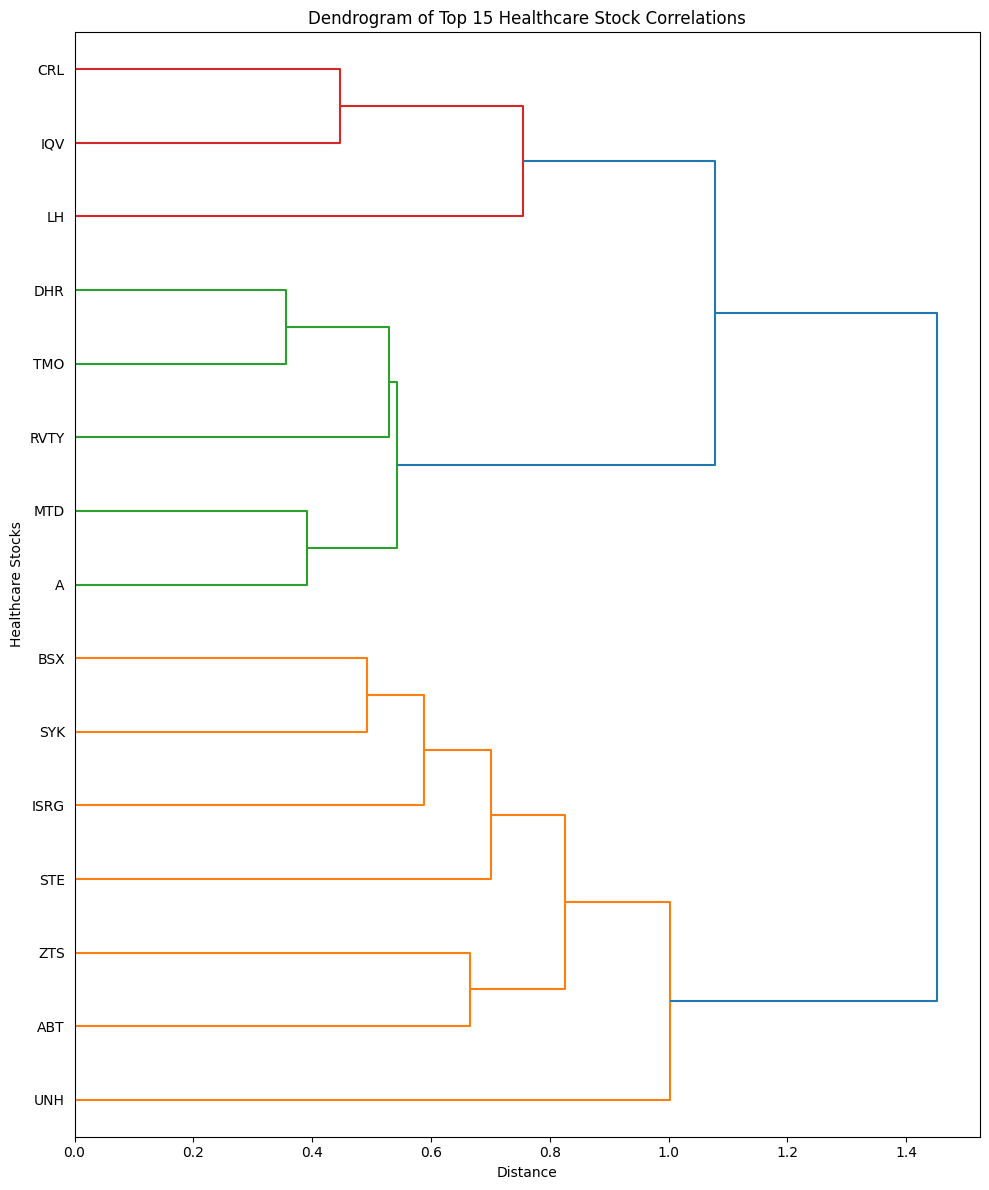

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# 1. Filter for healthcare stocks
healthcare_stocks = sp_df[sp_df['Sector'] == 'Healthcare']

# 2. Create pivot table for daily returns
returns_pivot = healthcare_stocks.pivot_table(values='Daily_Return', index='Date', columns='Symbol')

# 3. Calculate correlation matrix
healthcare_corr = returns_pivot.corr()

# 4. Select top 15 stocks based on highest average correlation
top_n = 15
avg_correlation = healthcare_corr.mean().sort_values(ascending=False)  # Rank by average correlation
top_symbols = avg_correlation.head(top_n).index  # Get top N symbols

# 5. Filter the correlation matrix for selected stocks
filtered_corr = healthcare_corr.loc[top_symbols, top_symbols]

# 6. Perform hierarchical clustering on the filtered matrix
linkage_matrix = linkage(filtered_corr, method='ward')

# 7. Plot the dendrogram horizontally
plt.figure(figsize=(10, 12), facecolor='none')  # Adjust figure size for horizontal layout
dendrogram(linkage_matrix, labels=filtered_corr.columns, leaf_rotation=0, orientation='right', leaf_font_size=10)

ax = plt.gca()  # Get current axes
ax.set_facecolor('none')

plt.title(f"Dendrogram of Top {top_n} Healthcare Stock Correlations")
plt.xlabel("Distance")
plt.ylabel("Healthcare Stocks")
plt.tight_layout()  # Adjust layout for better visualization
plt.show()


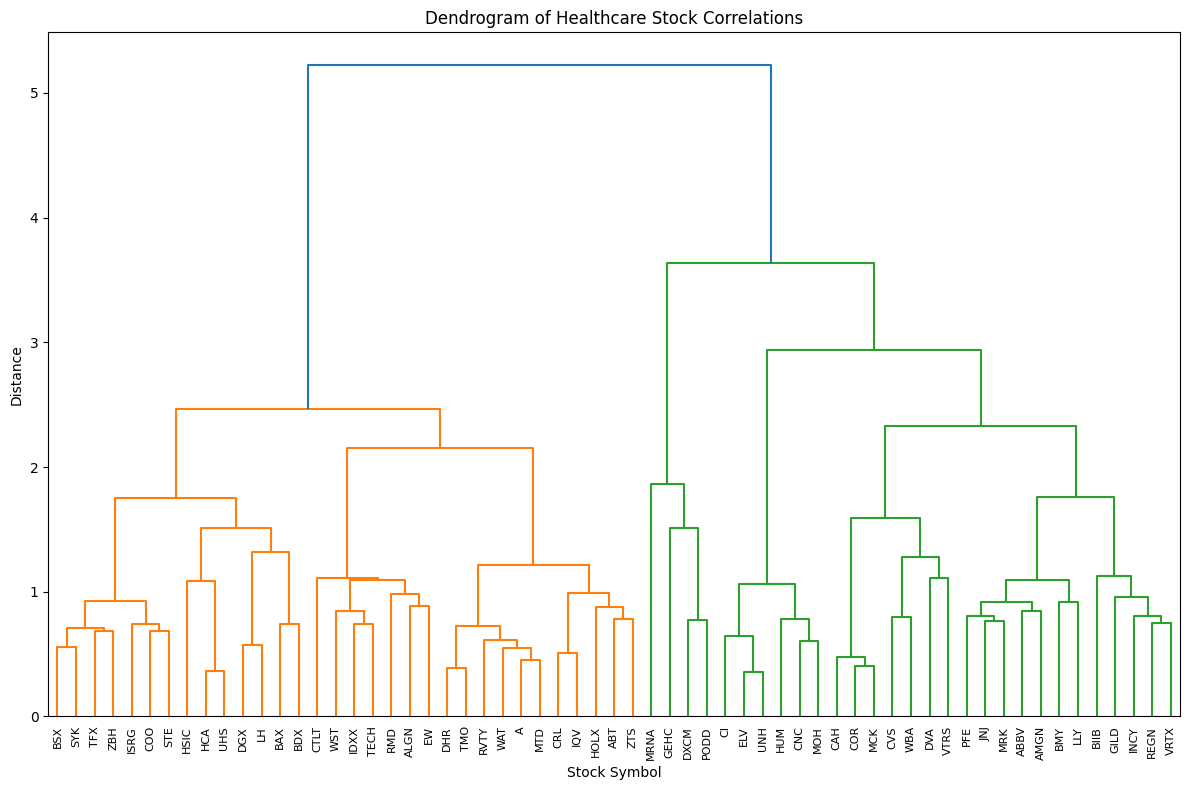

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# 1. Filter for healthcare stocks
healthcare_stocks = sp_df[sp_df['Sector'] == 'Healthcare']

# 2. Create pivot table for daily returns
returns_pivot = healthcare_stocks.pivot_table(values='Daily_Return', index='Date', columns='Symbol')

# 3. Calculate correlation matrix
healthcare_corr = returns_pivot.corr()

# 4. Perform hierarchical clustering
linkage_matrix = linkage(healthcare_corr, method='ward')  # You can try other methods like 'single', 'complete', 'average'

# 5. Plot the dendrogram
plt.figure(figsize=(12, 8), facecolor='none')  # Adjust figure size as needed
dendrogram(linkage_matrix, labels=healthcare_corr.columns, leaf_rotation=90, leaf_font_size=8)  # Adjust font size as needed

ax = plt.gca()  # Get current axes
ax.set_facecolor('none')

plt.title("Dendrogram of Healthcare Stock Correlations")
plt.xlabel("Stock Symbol")
plt.ylabel("Distance")
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

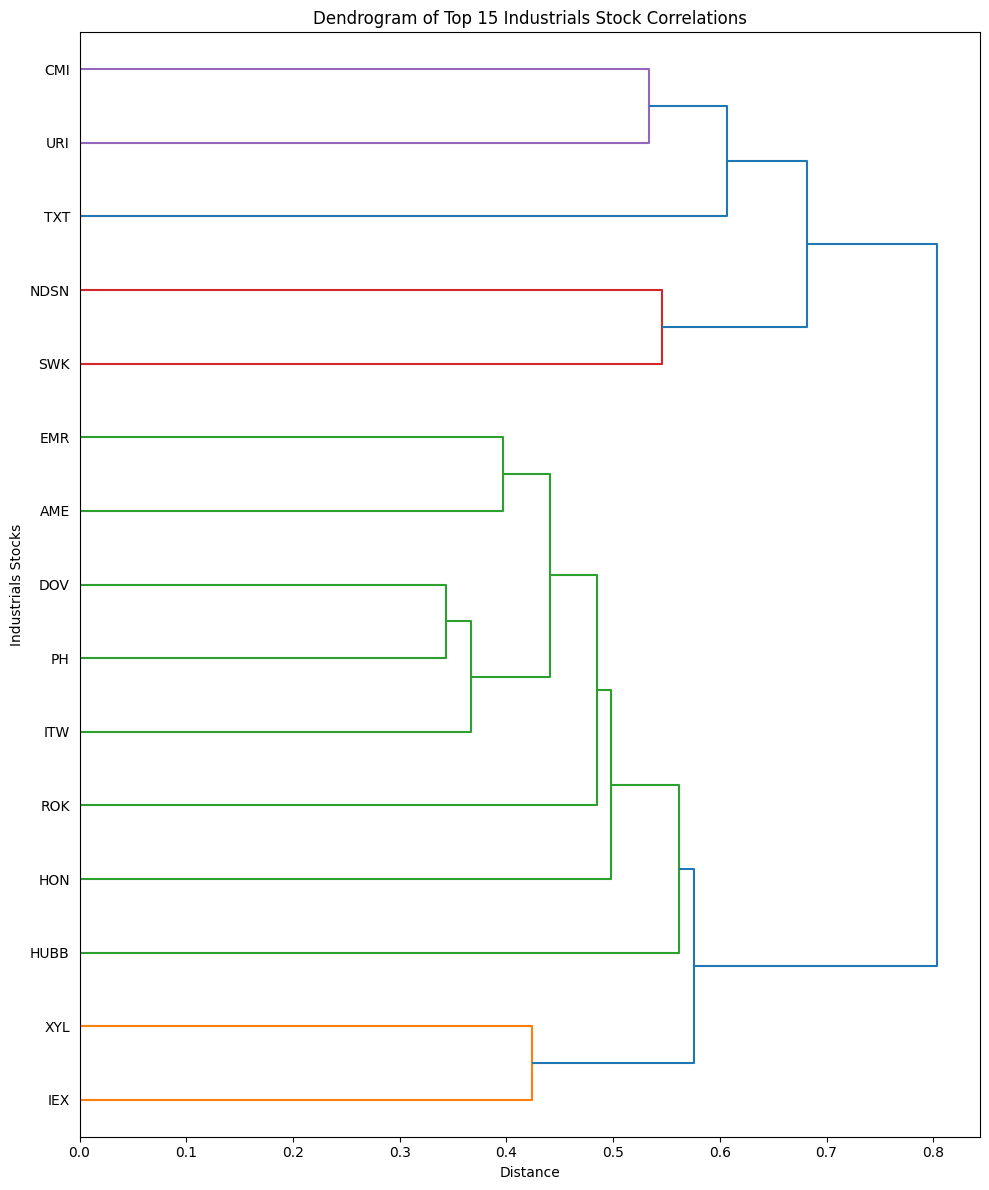

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# 1. Filter for industrials stocks
industrials_stocks = sp_df[sp_df['Sector'] == 'Industrials']

# 2. Create pivot table for daily returns
returns_pivot = industrials_stocks.pivot_table(values='Daily_Return', index='Date', columns='Symbol')

# 3. Calculate correlation matrix
industrials_corr = returns_pivot.corr()

# 4. Select top 15 stocks based on highest average correlation
top_n = 15  # Change to adjust the number of stocks
avg_correlation = industrials_corr.mean().sort_values(ascending=False)  # Rank by average correlation
top_symbols = avg_correlation.head(top_n).index  # Get top N symbols

# 5. Filter the correlation matrix for selected stocks
filtered_corr = industrials_corr.loc[top_symbols, top_symbols]

# 6. Perform hierarchical clustering on the filtered matrix
linkage_matrix = linkage(filtered_corr, method='ward')

# 7. Plot the dendrogram horizontally
plt.figure(figsize=(10, 12), facecolor='none')  # Adjust figure size for horizontal layout
dendrogram(linkage_matrix, labels=filtered_corr.columns, leaf_rotation=0, orientation='right', leaf_font_size=10)

ax = plt.gca()  # Get current axes
ax.set_facecolor('none')

plt.title(f"Dendrogram of Top {top_n} Industrials Stock Correlations")
plt.xlabel("Distance")
plt.ylabel("Industrials Stocks")
plt.tight_layout()  # Adjust layout for better visualization
plt.show()


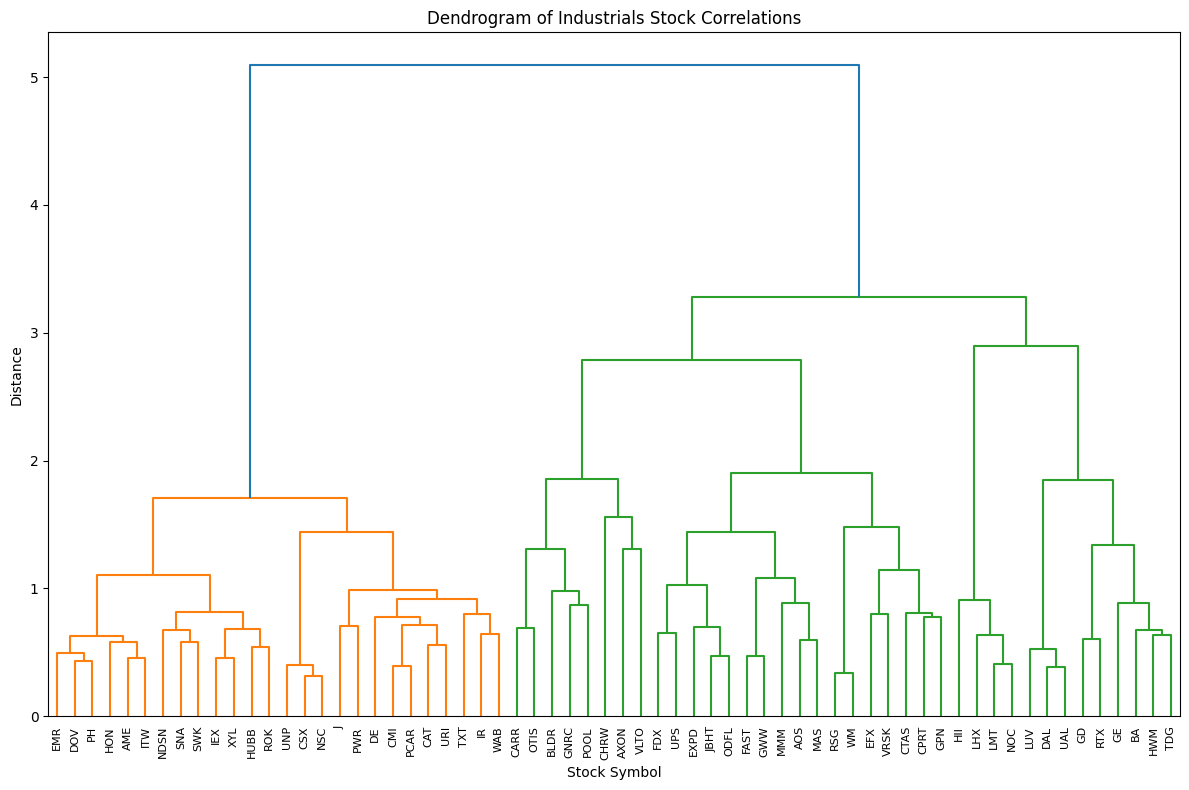

In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# 1. Filter for industrials stocks
industrials_stocks = sp_df[sp_df['Sector'] == 'Industrials']

# 2. Create pivot table for daily returns
returns_pivot = industrials_stocks.pivot_table(values='Daily_Return', index='Date', columns='Symbol')

# 3. Calculate correlation matrix
industrials_corr = returns_pivot.corr()

# 4. Perform hierarchical clustering
linkage_matrix = linkage(industrials_corr, method='ward')  # You can try other methods like 'single', 'complete', 'average'

# 5. Plot the dendrogram
plt.figure(figsize=(12, 8), facecolor='none')  # Adjust figure size as needed
dendrogram(linkage_matrix, labels=industrials_corr.columns, leaf_rotation=90, leaf_font_size=8)  # Adjust font size as needed
ax = plt.gca()  # Get current axes
ax.set_facecolor('none')
plt.title("Dendrogram of Industrials Stock Correlations")
plt.xlabel("Stock Symbol")
plt.ylabel("Distance")
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

In [ ]:
# Compute correlation matrix of industry returns
industry_correlation = sector_returns.corr()

# Convert correlation to distance metric (1 - correlation)
distance_matrix = 1 - industry_correlation

# Perform hierarchical clustering
linkage_matrix = sch.linkage(squareform(distance_matrix), method="ward")

# Create figure with transparent background
plt.figure(figsize=(12, 6), facecolor='none')

# Plot dendrogram with color threshold to group clusters
dendrogram = sch.dendrogram(
    linkage_matrix, labels=industry_correlation.index, leaf_rotation=45, color_threshold=0.6
)

plt.title("Clustering Dendrogram of Industry Returns", fontsize=14)
plt.ylabel("Distance (Dissimilarity)", fontsize=12)
plt.grid(True, alpha=0.5)  # Grid with transparency
plt.gca().set_facecolor('none')  # Transparent axes background

# Create a legend
legend_patches = [
    plt.Line2D([0], [0], color='orange', lw=3, label="Cluster 1: High-Growth Industries"),
    plt.Line2D([0], [0], color='green', lw=3, label="Cluster 2: Defensive/Stable Industries"),
    plt.Line2D([0], [0], color='blue', lw=3, label="Cluster 3: Broad Market Connection")  # If meaningful
]
plt.legend(handles=legend_patches, title="Industry Clusters", bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.show()


NameError: name 'sch' is not defined

### Stocks across different industries (e.g. do tech stocks seem to move in a similar fashion to stock in another industry?)

#### How correlated are stocks across industries?

In [ ]:
sp_df.columns

Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Exchange', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight',
       'S&P500', 'Daily_Return'],
      dtype='object')

In [ ]:
# show sector column rows
sp_df['Sector'].unique()

array(['Industrials', 'Healthcare', 'Technology', 'Utilities',
       'Financial Services', 'Basic Materials', 'Consumer Cyclical',
       'Real Estate', 'Communication Services', 'Consumer Defensive',
       'Energy'], dtype=object)

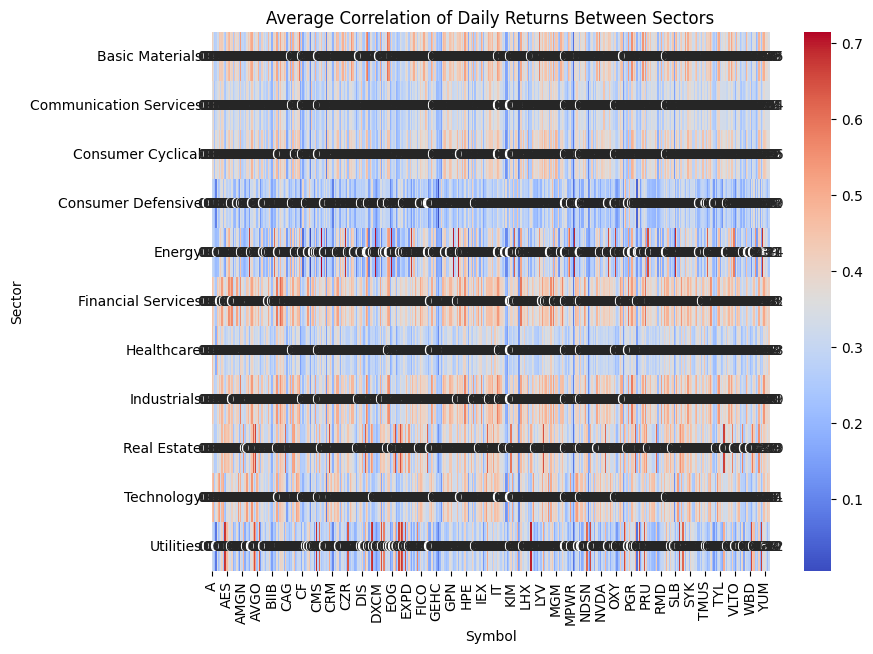

In [ ]:
# 1. Create daily returns pivot table
returns_pivot = sp_df.pivot_table(values='Daily_Return', index='Date', columns='Symbol')

# 2. Calculate the correlation matrix
industry_corr = returns_pivot.corr()

# 3. Create a sector mapping
sector_mapping = sp_df[['Symbol', 'Sector']].drop_duplicates().set_index('Symbol')['Sector']

# 4. Create a dataframe that stores the stock symbol and sector
industry_corr = industry_corr.reset_index().rename(columns={'index': 'Symbol'})
industry_corr['Sector'] = industry_corr['Symbol'].map(sector_mapping)

# 5. Group the correlation matrix by sector and compute the average correlations
sector_corr_df = industry_corr.drop(columns=['Symbol']).groupby('Sector').mean()

# 6. Visualize the correlation between sectors
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 7))
sns.heatmap(sector_corr_df, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Average Correlation of Daily Returns Between Sectors")
plt.show()


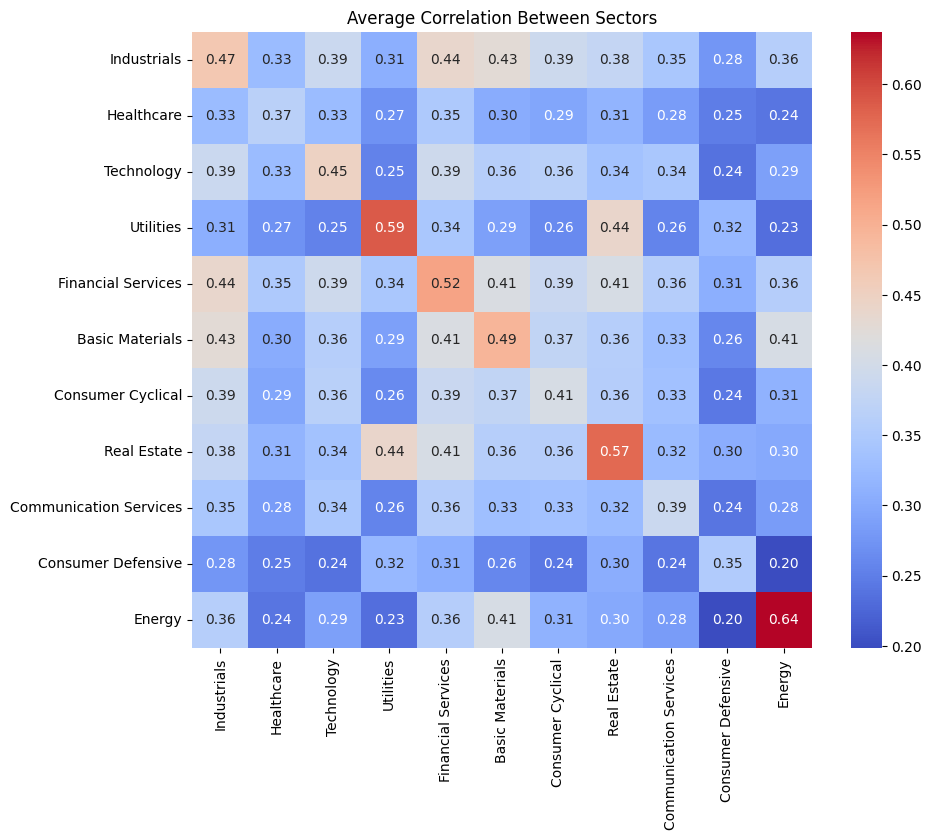

In [ ]:
# heatmap showing how entire sectors move relative to each other

# Create the daily returns pivot table
returns_pivot = sp_df.pivot_table(values='Daily_Return', index='Date', columns='Symbol')

# Compute the stock correlation matrix
stock_corr = returns_pivot.corr()

# Create a sector mapping
sector_mapping = sp_df[['Symbol', 'Sector']].drop_duplicates().set_index('Symbol')['Sector']

# Initialize an empty dataframe to store sector-level correlations
sector_corr_matrix = pd.DataFrame(index=sector_mapping.unique(), columns=sector_mapping.unique())

# Compute average correlations between sectors
for sector1 in sector_mapping.unique():
    for sector2 in sector_mapping.unique():
        # Get the stock symbols belonging to each sector
        stocks1 = sector_mapping[sector_mapping == sector1].index
        stocks2 = sector_mapping[sector_mapping == sector2].index

        # Compute the average correlation between the two sectors
        sector_corr = stock_corr.loc[stocks1, stocks2].mean().mean()
        sector_corr_matrix.loc[sector1, sector2] = sector_corr

# Convert to numeric and fill missing values
sector_corr_matrix = sector_corr_matrix.astype(float)

# Plot the fixed heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(sector_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Average Correlation Between Sectors")
plt.show()


## Bull and Bear Markets

**What Are Bull and Bear Markets?**

**Bull Market:**
A period when stock prices are rising or expected to rise. It’s generally characterized by investor confidence and optimism, often resulting in positive returns on major indices like the S&P 500.

**Bear Market:**
A period when stock prices are falling or expected to fall. It’s often characterized by pessimism and declining investor confidence, typically resulting in negative returns.

We define bull and bear markets using the daily returns of the S&P 500:

Bull Market: S&P 500 daily return > 0
Bear Market: S&P 500 daily return ≤ 0

Rolling correlations allow you to see how the relationship between two sectors changes over time.

For example, correlations may increase during market downturns (bear markets) but stay lower during normal or bull markets. This is important because correlations rising during crises can reduce diversification benefits.

<ipython-input-29-34e8c7cb0dff>:21: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stocks_df['Daily_Return'] = stocks_df.groupby('Symbol')['Close'].pct_change()


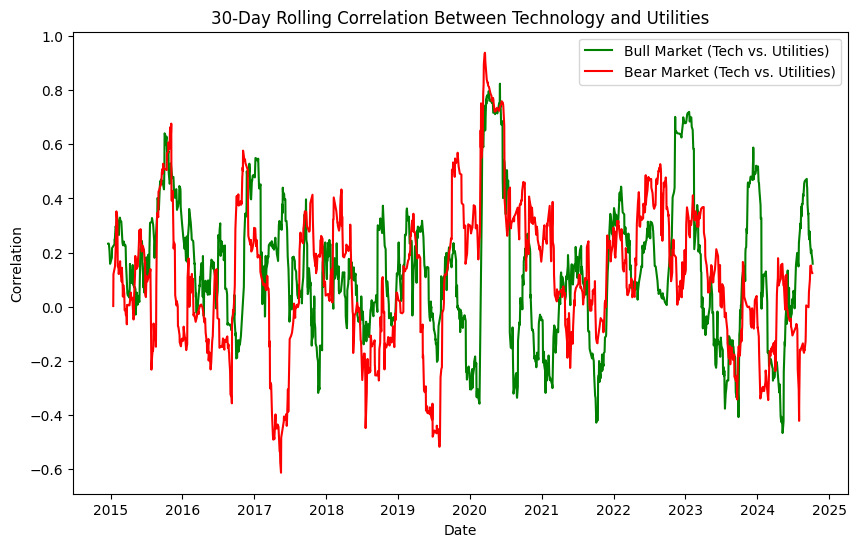

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Re-load the data just in case
stocks_df = pd.read_csv("/content/drive/MyDrive/Project 2 Group 3/sp500_stocks.csv")
companies_df = pd.read_csv("/content/drive/MyDrive/Project 2 Group 3/sp500_companies.csv")
index_df = pd.read_csv("/content/drive/MyDrive/Project 2 Group 3/sp500_index.csv")

# Convert 'Date' to datetime
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
index_df['Date'] = pd.to_datetime(index_df['Date'])

# Merge sector info and S&P 500 data
sector_mapping = companies_df[['Symbol', 'Sector']].drop_duplicates().set_index('Symbol')['Sector']
stocks_df['Sector'] = stocks_df['Symbol'].map(sector_mapping)

# Merge stocks_df with index_df on 'Date' column
stocks_df = stocks_df.merge(index_df[['Date', 'S&P500']], on='Date')

# Calculate daily returns and S&P 500 returns
stocks_df['Daily_Return'] = stocks_df.groupby('Symbol')['Close'].pct_change()
stocks_df['SP500_Return'] = stocks_df['S&P500'].pct_change()

# Classify dates into bull and bear markets
bull_market = stocks_df['SP500_Return'] > 0
bear_market = stocks_df['SP500_Return'] <= 0

# ivot table for average sector daily returns
sector_returns = stocks_df.groupby(['Date', 'Sector'])['Daily_Return'].mean().unstack()

# Filter dates based on market conditions
bull_dates = stocks_df.loc[bull_market, 'Date'].unique()
bear_dates = stocks_df.loc[bear_market, 'Date'].unique()

sector_returns_bull = sector_returns.loc[sector_returns.index.isin(bull_dates)]
sector_returns_bear = sector_returns.loc[sector_returns.index.isin(bear_dates)]

# Compute 30-day rolling correlations (Technology vs. Utilities as an example)
rolling_corr_bull = sector_returns_bull['Technology'].rolling(window=30).corr(sector_returns_bull['Utilities']).dropna()
rolling_corr_bear = sector_returns_bear['Technology'].rolling(window=30).corr(sector_returns_bear['Utilities']).dropna()

# Plot the rolling correlations
plt.figure(figsize=(10, 6))
plt.plot(rolling_corr_bull.index, rolling_corr_bull.values, label='Bull Market (Tech vs. Utilities)', color='green')
plt.plot(rolling_corr_bear.index, rolling_corr_bear.values, label='Bear Market (Tech vs. Utilities)', color='red')
plt.title('30-Day Rolling Correlation Between Technology and Utilities')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.show()


How to Interpret It:
- When the correlation is high (close to 1): Tech and Utility stocks are moving together in the same direction. If tech stocks go up, utility stocks tend to go up too.

- When the correlation is low (close to 0): The two sectors are not related—one could be going up while the other is going down, or they might be moving independently.
- When the correlation is negative (below 0): Tech and Utility stocks are moving in opposite directions. If tech stocks go up, utility stocks are likely going down, and vice versa.

What the Graph Is Saying:
- Higher correlations during bear markets (red): When the market is doing badly, tech and utility stocks tend to become more correlated and often move in the same direction. This is common during market crises when investors sell stocks across the board.
- Lower correlations during bull markets (green): When the market is doing well, tech and utilities move more independently. Tech stocks are driven by growth and innovation, while utility stocks are stable and driven by consistent demand (like electricity or water).

Noticeable spikes:
- Around 2020 (COVID-19 crash), there’s a big spike in correlations. This shows that during major events, even sectors that are usually independent can move together because of market-wide panic.

Takeaway:
- Stocks within the same industry (like tech) are typically highly interconnected, meaning diversification within a single industry may not significantly reduce risk—especially during downturns.
- Across different industries, correlations vary with market conditions. Defensive sectors (like Utilities or Consumer Defensive) are good diversifiers during normal market conditions but lose some of that diversification benefit during bear markets.



<ipython-input-30-9ace59d981e8>:21: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stocks_df['Daily_Return'] = stocks_df.groupby('Symbol')['Close'].pct_change()


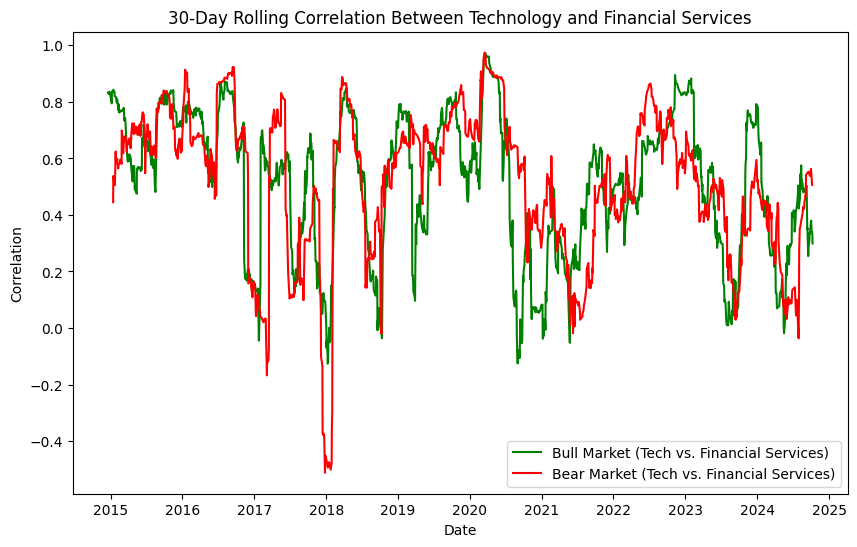

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Re-load the data just in case
stocks_df = pd.read_csv("/content/drive/MyDrive/Project 2 Group 3/sp500_stocks.csv")
companies_df = pd.read_csv("/content/drive/MyDrive/Project 2 Group 3/sp500_companies.csv")
index_df = pd.read_csv("/content/drive/MyDrive/Project 2 Group 3/sp500_index.csv")

# Convert 'Date' to datetime
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
index_df['Date'] = pd.to_datetime(index_df['Date'])

# Merge sector info and S&P 500 data
sector_mapping = companies_df[['Symbol', 'Sector']].drop_duplicates().set_index('Symbol')['Sector']
stocks_df['Sector'] = stocks_df['Symbol'].map(sector_mapping)

# Merge stocks_df with index_df on 'Date' column
stocks_df = stocks_df.merge(index_df[['Date', 'S&P500']], on='Date')

# Calculate daily returns and S&P 500 returns
stocks_df['Daily_Return'] = stocks_df.groupby('Symbol')['Close'].pct_change()
stocks_df['SP500_Return'] = stocks_df['S&P500'].pct_change()

# Classify dates into bull and bear markets
bull_market = stocks_df['SP500_Return'] > 0
bear_market = stocks_df['SP500_Return'] <= 0

# ivot table for average sector daily returns
sector_returns = stocks_df.groupby(['Date', 'Sector'])['Daily_Return'].mean().unstack()

# Filter dates based on market conditions
bull_dates = stocks_df.loc[bull_market, 'Date'].unique()
bear_dates = stocks_df.loc[bear_market, 'Date'].unique()

sector_returns_bull = sector_returns.loc[sector_returns.index.isin(bull_dates)]
sector_returns_bear = sector_returns.loc[sector_returns.index.isin(bear_dates)]

# Compute 30-day rolling correlations (Technology vs. Utilities as an example)
rolling_corr_bull = sector_returns_bull['Technology'].rolling(window=30).corr(sector_returns_bull['Financial Services']).dropna()
rolling_corr_bear = sector_returns_bear['Technology'].rolling(window=30).corr(sector_returns_bear['Financial Services']).dropna()

# Plot the rolling correlations
plt.figure(figsize=(10, 6))
plt.plot(rolling_corr_bull.index, rolling_corr_bull.values, label='Bull Market (Tech vs. Financial Services)', color='green')
plt.plot(rolling_corr_bear.index, rolling_corr_bear.values, label='Bear Market (Tech vs. Financial Services)', color='red')
plt.title('30-Day Rolling Correlation Between Technology and Financial Services')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.show()
